# Data Driven March Madness: The Search for the Perfect Bracket

Harvard CS109 final project, submitted December 2016

Isabel Lee and Christina Tenuta

## Notebook Contents

[0 Introduction](#1)
    

# 0 Introduction

<a id = '0'></a>


## Project Overview and Related Work
We set out to create and algorithm that could predict a March Madness bracket. Every year, March Madness is one of the most heavily bet on sporting events. March Madness brackets are notoriously difficult to predict. Using data science to predict a bracket could lead to a prediction that wins a lot of money in any given tournament. We aim to build a bracket that uses not only basketball statistics from the regular season, but also deeper insights using historical data. Our model is also driven by the optimization of a typical scoring mechanism of one’s bracket tournament. Related work includes predictions for NFL or NBA season outcomes, as well.

## Background and Motivation
March Madness has become one of the most popular sporting events in the United States. It has been estimated that millions of Americans participate in bracket tournaments every year. ESPN, CBS Sports, and Fox Sports host tournaments every year. 

In 2014, Warren Buffet offered a billion dollars to anyone who could predict a perfect bracket, and not a single person was able to. March Madness has become a lucrative way of gambling in the past years. In light of the seemingly impossible perfect bracket, we aim to use data science to create an algorithm that maximizes the typical scoring mechanism in bracket tournaments to optimize chances of winning in any given bracket tournament. 

Brackets are generally scored by giving more weight to the later games. For example, every game guessed correctly is worth 1 point in the first round, 2 points in the second, 4 points in the third and so on, so forth. Thus, the final round is worth 32 points, out of a total 192 possible points. Picking the last game correctly has huge influence, as the predictor not only predicted the correct winning teams of the final 4, but also the final game, for a total 64 points, or one third of the total points overall. Consequently, the scoring mechanism places much greater importance on the later games. We would like our bracket to optimize for this scoring mechanism.

A major challenge participants in a bracket tournament tend to face is the unpredictability of the games. Not only are the chances of predicting a fully correct bracket worse than a billion to one against, but there are factors outside of simple offensive or defensive statistics that make the feat incredibly difficult. Variables such as momentum, confidence, distance from home school, and such are qualitative statistics that can have large impacts on the outcome of games.

Using data science, we propose the creation of a bracket using not only basketball statistics from the competing teams’ regular seasons, but also for factors less quantitative, such as momentum and confidence. 

## Initial Questions
Initially, the goal of this project was to simply create an algorithm that would predict a March Madness bracket that produced the highest score given the tournament scoring mechanism. However, over the course of the project, more questions evolved as we began to think about how we would get to this bracket in the first place. 
  * Beyond quantitative variables, what qualitative variables drive a team’s wins?
  * How can we use linear regression to determine one team winning over another?
  * How do we make our model optimize for the scoring mechanism and not the accuracy?
  * How should our train and testing data sets operate within the model?
  
## Overview of Our Process
First, we began scraping data found from the Kaggle competition. We then completed a series of data analyses to explore how different variables related to one another and get a sense of what data might be important and what might not be. The result of such analysis was the realization that March Madness outcomes are extremely difficult to predict, and the ability to predict upsets and make a bracket different from the standard are important. 

The information collected allowed us to form our process, which includes an extensive amount of data processing. Essentially, we created feature vectors, which included offensive, defensive, and some more nuanced statistics, for each team in order to asses the quality of each team and utilized a logistic regression that calculated the probability of one team beating another given the feature vectors of the two teams. Because creating a March Madness bracket involves more than just the ability to predict games correctly, we looked at all the probabilities and moved teams on in the tournament if they had a high chance of winning their game. For games where the probablity of winning or losing was extremely close to .5, we tuned a range for which the most upsets occur. In terms of accuracy, we scored our model in comparison to a baseline model that simply passed the team with the lowest seed (the percieved best team) on in the tournament. 


In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression as Lin_Reg
import matplotlib.cm as cmx
import matplotlib.colors as colors
import pandas as pd
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.cross_validation import train_test_split as sk_split
from sklearn.decomposition import PCA
%matplotlib inline
import random

# 1 Data Exploration

<a id = '1'></a>


For this project, we analyzed multiple datasets, including:
  * Regular season statistics
  * Tournament statistics
  * Team seeds
  
Our regular season data extends back until 2003, ending in 2016, the year the competition was released on Kaggle. All data can be found here: 
[Kaggle Competition](https://www.kaggle.com/c/march-machine-learning-mania-2016/data)

### Game Data

Data for both the tournament and regular season was available, and included such statistics such as the winning team's score, the number of free throws made for each team, etc. Each row represents a game, with the team ID corresponding to a team's name. 

In [33]:
tourneydetailed = pd.read_csv('march-machine-learning-mania-2016-v2/TourneyDetailedResults.csv', delimiter = ',')
tourneydetailed.head()

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot,Wfgm,Wfga,...,Lfga3,Lftm,Lfta,Lor,Ldr,Last,Lto,Lstl,Lblk,Lpf
0,2003,134,1421,92,1411,84,N,1,32,69,...,31,14,31,17,28,16,15,5,0,22
1,2003,136,1112,80,1436,51,N,0,31,66,...,16,7,7,8,26,12,17,10,3,15
2,2003,136,1113,84,1272,71,N,0,31,59,...,28,14,21,20,22,11,12,2,5,18
3,2003,136,1141,79,1166,73,N,0,29,53,...,17,12,17,14,17,20,21,6,6,21
4,2003,136,1143,76,1301,74,N,1,27,64,...,21,15,20,10,26,16,14,5,8,19


In [34]:
regdetailed = pd.read_csv('march-machine-learning-mania-2016-v2/RegularSeasonDetailedResults.csv', delimiter = ',')
regdetailed.head()

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot,Wfgm,Wfga,...,Lfga3,Lftm,Lfta,Lor,Ldr,Last,Lto,Lstl,Lblk,Lpf
0,2003,10,1104,68,1328,62,N,0,27,58,...,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,...,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,...,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,...,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,...,16,17,27,21,15,12,10,7,1,14


### Team ID Data

Each team has a unique ID by whiched they are identified in the above data sets.

In [35]:
teams = pd.read_csv('march-machine-learning-mania-2016-v2/teams.csv', delimiter = ',')
teams.head()

,Team_Id,Team_Name
0,1101,Abilene Chr
1,1102,Air Force
2,1103,Akron
3,1104,Alabama
4,1105,Alabama A&M


### Seed Data

The tournament seed data provides which team is in which slot of the bracket. 

In [38]:
tourneyseeds = pd.read_csv('march-machine-learning-mania-2016-v2/tourneyseeds.csv', delimiter = ',')
tourneyseeds.head()

,Season,Seed,Team
0,1985,W01,1207
1,1985,W02,1210
2,1985,W03,1228
3,1985,W04,1260
4,1985,W05,1374


### Tournament Results Data

The tournament results are provided in this data set, which the team ID number informing us which teams are playing in which game and a given round of the tournament any given year.

In [39]:
tourneyslots = pd.read_csv('march-machine-learning-mania-2016-v2/tourneyslots.csv', delimiter = ',')
tourneyslots.head()

,Season,Slot,Strongseed,Weakseed
0,1985,R1W1,W01,W16
1,1985,R1W2,W02,W15
2,1985,R1W3,W03,W14
3,1985,R1W4,W04,W13
4,1985,R1W5,W05,W12


## More Information
For more data exploration, please see the data exploration notebook located in the project folder. 


# 2 Building the Model

<a id = '2'></a>

In order to build the model, we first built the functions that we would need in order to complete all of the steps of our process. The steps are as follows:
1. Assign feature vectors for each team in the tournament using regular season statistics
2. Tune PCA components to account for correlation of offensive and defensive statistics
3. Append momentum, elo score, and consistency to the vectors
4. Train the model with 3 years of tournament data using logistic regression (tuning C) to determine probabilities of one team winnings over another
5. Predict probabilities of all possible games in the test year tournament using the model
6. Build a bracket predicting the model, tuning for the range in which upsets will occur
7. Score the bracket based on the weighted scoring mechanism, weighting variability from the seed model

More detail about each of these steps is included as they are performed.

## 2.1 Methodology
<a id = '2.1'></a>

In this segment, we will explain the methodology behind our model, which is extremely important in building a model. First, I will address our strategy for winning a bracket tournament. This strategy is based on the idea that thousands of people compete in March Madness brackets every year. In order to win these winner-take-all style tournaments, it is important that a bracket not only score the highest, but is also the most different. Thus, our choice to tune the upset range of our model and then choose the underdog to win in this range is driven by the fact that we would like our model to be most different from the other brackets. Likewise, we include a function to account for the variance of our model from the seed model in the weighted score. In other words, brackets that are more different from the seed model earn more points because they are different. 

Secondly, I will address our choice to tune the model based on weighted score rather than accuracy of predicted games. Again, the weighted score system of March Madness brackets increases the points earned for games guessed correctly geometrically. Thus, guessing the later games correctly is much more important than say, the round of 64. Consequently, we chose to tune our model to score well rather than simply predict games well. 

Lastly, our choice to train the model using 3 years before the test year is driven by two suppositions. The first is that the game changes over the years. Teams might score more points, foul less, etc. over the course of history. To account for these changing aspects of the game, we used 3 years before the test year to train our model. Secondly, we use 3 years before the test year to avoid leaking data to our model from the test year set. If we were to randomly choose test and train sets, our data could leak information to the model, making it seemingly more accurate while really taking away from the models accuracy on future test sets. 

Ultimately, our goal was to create a high scoring model based on the bracket scoring system.

### Bracket Functions

These functions account for the filling of the brackets and later enable us to score the brackets by looking at both the baseline model and the seed model to compare to actual results. They also score the baseline bracket and the predicted bracket by both number of games correctly predicted and the weighted scores (using a typical March Madness bracket scoring system). Note that the model's weighted score is also weighted for its variability from the baseline model. In other words, the more the model's bracket differs from the baseline model, the better the score. This results from us wanting our bracket to be as different as possible from the baseline. 

In [3]:
#given two teams and their scoring dataframe -> returns winning team
def predicted_winning_team(team1, team2, team_scores):
    team1_score = team_scores[team_scores['Team'] == team1]
    team2_score = team_scores[team_scores['Team'] == team2]
    
    if team1_score['SCORE'].values[0] > team2_score['SCORE'].values[0]: 
        return team1_score['Team'].values[0]
    else:
        return team2_score['Team'].values[0]

In [4]:
#function to fill in team names into winning bracket 

def num_to_name(teams, final_bracket_nums):
    #create copy of bracket
    final_bracket_names = final_bracket_nums.copy()

    #move through rows 
    for index, row in final_bracket_names.iterrows():
        #fill in Strongseed team numbers 
        team1 = teams[teams['Team_Id'] == row['Strongseed']]
        final_bracket_names.loc[index, 'Strongseed'] = team1['Team_Name'].values[0]
        #fill in Weakseed team numbers 
        team2 = teams[teams['Team_Id'] == row['Weakseed']]
        final_bracket_names.loc[index, 'Weakseed'] = team2['Team_Name'].values[0]
        #fill in winning team seed numbers
        winning_team = teams[teams['Team_Id'] == row['WinningTeam']]
        final_bracket_names.loc[index, 'WinningTeam'] = winning_team['Team_Name'].values[0]

    return final_bracket_names



In [5]:
#given two teams and the tourney results dataframe -> returns winning team
def actual_winning_team(team1, team2, tourney_results):
    game = tourney_results[((tourney_results['Wteam'] == team1) & (tourney_results['Lteam'] == team2))
                           | ((tourney_results['Wteam'] == team2) & (tourney_results['Lteam'] == team1))]
    winning_team = game['Wteam'].values[0]
    return winning_team

In [6]:
#given list of seeds, initial bracket, and team scores -> fills in actual bracket. 

def actual_bracket(seeds, initial_bracket, tourney_results):
    #create DF to store final brackiet
    actual_final_bracket = initial_bracket.copy()
    actual_final_bracket["WinningTeam"] = np.nan
    actual_final_bracket.insert(2, 'Round', 'NaN', allow_duplicates=True)
    
    #fill in round number 
    #fill in 1-6
    rounds  = [1, 2, 3, 4, 5, 6]
    for i in rounds:
        for index, row in actual_final_bracket.iterrows():
            r = row['Slot']
            if r.startswith('R' + str(i)) == True: 
                actual_final_bracket.set_value(index, 'Round', i)
                
    #for later tourneys, fill in round 0
    for index, row in actual_final_bracket.iterrows():
        if row['Round'] == 'NaN': 
            actual_final_bracket.set_value(index, 'Round', 0)

            
    #fill in winning teams and seed numbers in rounds
    rounds  = [0, 1, 2, 3, 4, 5, 6]
    for i in rounds:
        for index, row in actual_final_bracket.iterrows():
            r = row['Round']
            if r == i:
                if row['Round'] == 0: 
                    #fill in Strongseed team numbers 
                    team1 = seeds[seeds['Seed'] == row['Strongseed']]
                    t1 = team1['Team'].values[0]
                    actual_final_bracket.loc[index, 'Strongseed'] = t1
                    #fill in Weakseed team numbers 
                    team2 = seeds[seeds['Seed'] == row['Weakseed']]
                    t2 = team2['Team'].values[0]
                    actual_final_bracket.loc[index, 'Weakseed'] = t2
                    #fill in winning team 
                    actual_final_bracket.loc[index, 'WinningTeam'] = actual_winning_team(t1, t2, tourney_results)
                    
                elif row['Round'] == 1:
                    #fill in Strongseed team numbers 
                    team1 = seeds[seeds['Seed'] == row['Strongseed']]
                    t1 = team1['Team'].values[0]
                    actual_final_bracket.loc[index, 'Strongseed'] = t1
                    #fill in Weakseed team numbers 
                    team2 = seeds[seeds['Seed'] == row['Weakseed']]
                    if team2.empty == False:
                        t2 = team2['Team'].values[0]
                        actual_final_bracket.loc[index, 'Weakseed'] = t2
                    else:
                        team2 = actual_final_bracket[actual_final_bracket['Slot'] == row['Weakseed']]
                        t2 = team2['WinningTeam'].values[0]
                        actual_final_bracket.loc[index, 'Weakseed'] = t2
                    #fill in winning team 
                    actual_final_bracket.loc[index, 'WinningTeam'] = actual_winning_team(t1, t2, tourney_results)
                
                else: #fill in rest of rounds
                    #fill in strong seed
                    team1 = actual_final_bracket[actual_final_bracket['Slot'] == row['Strongseed']]
                    t1 = team1['WinningTeam'].values[0]
                    actual_final_bracket.loc[index, 'Strongseed'] = t1
                    #fill in weak seed 
                    team2 = actual_final_bracket[actual_final_bracket['Slot'] == row['Weakseed']]
                    t2 = team2['WinningTeam'].values[0]
                    actual_final_bracket.loc[index, 'Weakseed'] = t2
                    #fill in winning team 
                    actual_final_bracket.loc[index, 'WinningTeam'] = actual_winning_team(t1, t2, tourney_results)
    
    actual_final_bracket['WinningTeam'] = actual_final_bracket['WinningTeam'].astype(int)
    
    return actual_final_bracket

In [7]:
#given list of seeds, initial bracket -> fills in lowest seed bracket. 
def seed_bracket(seeds, initial_bracket):
    #create DF to store final bracket
    lower_seed_bracket = initial_bracket.copy()
    lower_seed_bracket["WinningTeam"] = np.nan
    lower_seed_bracket.insert(2, 'Round', 'NaN', allow_duplicates=True)
    
    #fill in round number 
    #fill in 1-6
    rounds  = [1, 2, 3, 4, 5, 6]
    for i in rounds:
        for index, row in lower_seed_bracket.iterrows():
            r = row['Slot']
            if r.startswith('R' + str(i)) == True: 
                lower_seed_bracket.set_value(index, 'Round', i)
                
    #for later tourneys, fill in round 0
    for index, row in lower_seed_bracket.iterrows():
        if row['Round'] == 'NaN': 
            lower_seed_bracket.set_value(index, 'Round', 0)
    
    #fill in winning teams and seed numbers in rounds
    rounds  = [0, 1, 2, 3, 4, 5, 6]
    for i in rounds:
        for index, row in lower_seed_bracket.iterrows():
            r = row['Round']
            if r == i:
                if row['Round'] == 0: 
                    #fill in Strongseed team numbers 
                    team1 = seeds[seeds['Seed'] == row['Strongseed']]
                    t1 = team1['Team'].values[0]
                    lower_seed_bracket.loc[index, 'Strongseed'] = t1
                    #fill in Weakseed team numbers 
                    team2 = seeds[seeds['Seed'] == row['Weakseed']]
                    t2 = team2['Team'].values[0]
                    lower_seed_bracket.loc[index, 'Weakseed'] = t2
                    #fill in winning team 
                    lower_seed_bracket.loc[index, 'WinningTeam'] = t1
                    
                elif row['Round'] == 1:
                    #fill in Strongseed team numbers 
                    team1 = seeds[seeds['Seed'] == row['Strongseed']]
                    t1 = team1['Team'].values[0]
                    lower_seed_bracket.loc[index, 'Strongseed'] = t1
                    #fill in Weakseed team numbers 
                    team2 = seeds[seeds['Seed'] == row['Weakseed']]
                    if team2.empty == False:
                        t2 = team2['Team'].values[0]
                        lower_seed_bracket.loc[index, 'Weakseed'] = t2
                    else:
                        team2 = lower_seed_bracket[lower_seed_bracket['Slot'] == row['Weakseed']]
                        t2 = team2['WinningTeam'].values[0]
                        lower_seed_bracket.loc[index, 'Weakseed'] = t2
                    #fill in winning team 
                    lower_seed_bracket.loc[index, 'WinningTeam'] = t1
                
                else: #fill in rest of rounds
                    #fill in strong seed
                    team1 = lower_seed_bracket[lower_seed_bracket['Slot'] == row['Strongseed']]
                    t1 = team1['WinningTeam'].values[0]
                    lower_seed_bracket.loc[index, 'Strongseed'] = t1
                    #fill in weak seed 
                    team2 = lower_seed_bracket[lower_seed_bracket['Slot'] == row['Weakseed']]
                    t2 = team2['WinningTeam'].values[0]
                    lower_seed_bracket.loc[index, 'Weakseed'] = t2
                    #fill in winning team 
                    lower_seed_bracket.loc[index, 'WinningTeam'] = t1
    
    
    
    return lower_seed_bracket

In [8]:
#function that calculates accuracy by just counting games correct
def count_accuracy(predicted_bracket, actual_bracket):
    actual_bracket['PredictedWinner'] = predicted_bracket['WinningTeam']
    
    correct_games = actual_bracket[actual_bracket['WinningTeam'] == actual_bracket['PredictedWinner']]
    incorrect_games = actual_bracket[actual_bracket['WinningTeam'] != actual_bracket['PredictedWinner']]
    
    accuracy = float(correct_games.shape[0])/float(actual_bracket.shape[0])

    return correct_games.shape[0] 

In [9]:
#function that calculates the accuracy of a model where the round is weighed by the round number. (Round 0 = 1)
def round_accuracy(predicted_bracket, actual_bracket):
    actual_bracket['PredictedWinner'] = predicted_bracket['WinningTeam']
    
    #find max points 
    max_score = np.array(actual_bracket['Round']).sum() + actual_bracket[actual_bracket['Round'] == 0].shape[0] 
    
    #find correct games and actual score
    correct_games = actual_bracket[actual_bracket['WinningTeam'] == actual_bracket['PredictedWinner']]
    score = np.array(correct_games['Round']).sum() + correct_games[correct_games['Round'] == 0].shape[0]
    
    #accuracy 
    accuracy = float(score)/float(max_score)
    
    return accuracy 
    

In [10]:
#function that calculates the accuracy of a model where the round is weighed by the round number. (Round 0 = 1)
def weighted_accuracy(predicted_bracket, actual_bracket):
    actual_bracket['PredictedWinner'] = predicted_bracket['WinningTeam']
    
    #find max points 
    max_score = actual_bracket[actual_bracket['Round'] == 0].shape[0] 
    weight = 1
    for i in [1,2,3,4,5,6]:
        max_score = max_score + (weight * actual_bracket[actual_bracket['Round'] == i].shape[0])
        weight = weight*2
        
    #find correct games and actual score
    correct_games = actual_bracket[actual_bracket['WinningTeam'] == actual_bracket['PredictedWinner']]
    score = correct_games[correct_games['Round'] == 0].shape[0] 
    weight = 1
    for i in [1,2,3,4,5,6]:
        score = score + (weight * correct_games[correct_games['Round'] == i].shape[0])
        weight = weight*2
        
    accuracy = float(score)/float(max_score)
        
    return score  


In [11]:
#function that calculates the accuracy of a model where the round is weighed by the round number. (Round 0 = 1)
def weighted_variable_accuracy(predicted_bracket, seed_bracket, actual_bracket):
    actual_bracket['PredictedWinner'] = predicted_bracket['WinningTeam']
    
    #find max points 
    max_score = actual_bracket[actual_bracket['Round'] == 0].shape[0] 
    weight = 1
    for i in [1,2,3,4,5,6]:
        max_score = max_score + (weight * actual_bracket[actual_bracket['Round'] == i].shape[0])
        weight = weight*2
        
    #find correct games and actual score
    correct_games = actual_bracket[actual_bracket['WinningTeam'] == actual_bracket['PredictedWinner']]
    score = correct_games[correct_games['Round'] == 0].shape[0] 
    weight = 1
    for i in [1,2,3,4,5,6]:
        score = score + (weight * correct_games[correct_games['Round'] == i].shape[0])
        weight = weight*2
        
    accuracy = float(score)/float(max_score)
    
    #find uniqueness score 
    unique_teams = seed_bracket['WinningTeam'] - predicted_bracket['WinningTeam']
    differences = unique_teams.astype(bool).sum(axis=0)
    unique_score = 2*score/(predicted_bracket.shape[0] - differences)
    
    return (unique_score + score) 

In [12]:
#function that finds average based on W and L averages and total games
def find_avg(wavg, lavg, nw, nl):
    weighted_sum = (wavg*nw) + (lavg*nl) 
    total_games = nw+nl
    weighted_avg = weighted_sum/total_games
    return weighted_avg

#function that gives seed number given team 
def seed_num(tourney_seeds, team):
    game = tourney_seeds[tourney_seeds['Team'] == team]
    seed = game['Seed'].values[0]
    seed_num = seed[1:]
    if seed_num[-1].isdigit() == True: 
        seed_num = int(seed_num)
        return seed_num
    else: 
        seed_num = seed_num[:-1]
        seed_num = int(seed_num)
        return seed_num

### Feature Vector Creation

Using these functions, we created feature vectors for each team. Statistics include the percentage of times each team one, the average score of their regular season games, and their average shots made. To account for more nuanced factors that can affect game outcomes, we also made functions to compute elo score (a comparison method to score teams against each other), momentum, and consistency. 

Elo is calculted by looking at the outcomes of certain games and rewarding teams for beating better teams by a larger number than for beating worse teams. Momentum going into the tournament was calculated teams a score using both the number of games won in the last 10 games before the tournament and accounting for elo score of the other team. For instance, if a team beats an extremely good team, their momentum increases by more than if they were to beat a worse ranked team, with more weight put on the games right before the tournament. Consistency is a measure of whether or not teams play to their ability or to the other team during their games. It numerically answers the question: Will a team win or lose to another team by the same amount every time or will they increase that number based on skill level? Consistency is the standard deviation of the amount teams win by in the regular season games. The lower the consistency, the more a team plays to its opponents. 

In [13]:
#function that finds the stats of all teams

def sum_statistics(season_stats, tourney_results, tourney_seeds, y):
    
    #create dataframe to hold stats
    cols = ['Season', 'Team', 'Winning %', 'Losing %', 'AvgScore', 'AvgShotsMade', 
           'AvgShotsAttempted', 'Shooting %', 'AvgThreeMade', 'AvgThreeAttempted',
           'Three %', 'AvgFreeThrowMade', 'AvgFreeThrowAttemped', 'FreeThrow %', 
           'AvgOffensiveRebounds', 'AvgDefensiveRebounds', 'AvgAssists', 'AvgTurnovers',
           'AvgSteals', 'AvgBlocks', 'AvgPersonalFouls']
    stats = pd.DataFrame(columns = cols)
    
    #filter to one year 
    season_stats_y = season_stats[season_stats['Season'] == y]
    tourney_results_y = tourney_results[tourney_results['Season'] == y]
    tourney_seeds_y = tourney_seeds[tourney_seeds['Season'] == y]

    #find what teams were in tourney in year y 
    #list of team numbers 
    team_nums = np.array(tourney_seeds_y['Team'])

    for i in team_nums:
        #filter for specific team 
        games_won = season_stats_y[season_stats_y['Wteam'] == i]
        games_lost = season_stats_y[season_stats_y['Lteam'] == i]
        num_won = float(games_won.shape[0])
        num_lost = float(games_lost.shape[0])
        total_games = num_won + num_lost 
        
        if num_lost != 0:
    
            #calc raw averages 
            won_averages = games_won.mean()
            lost_averages = games_lost.mean() 

            #stats
            perc_won = float(games_won.shape[0])/ total_games
            perc_lost = float(games_lost.shape[0])/ total_games
            score = find_avg(won_averages[3], lost_averages[5], num_won, num_lost)
            fgm = find_avg(won_averages[7], lost_averages[20], num_won, num_lost)
            fga = find_avg(won_averages[8], lost_averages[21], num_won, num_lost)
            fgm3 = find_avg(won_averages[9], lost_averages[22], num_won, num_lost)
            fga3 = find_avg(won_averages[10], lost_averages[23], num_won, num_lost)
            ftm = find_avg(won_averages[11], lost_averages[24], num_won, num_lost)
            fta = find_avg(won_averages[12], lost_averages[25], num_won, num_lost)
            _or = find_avg(won_averages[13], lost_averages[26], num_won, num_lost)
            dr = find_avg(won_averages[14], lost_averages[27], num_won, num_lost)
            ast = find_avg(won_averages[15], lost_averages[28], num_won, num_lost)
            to = find_avg(won_averages[16], lost_averages[29], num_won, num_lost)
            stl = find_avg(won_averages[17], lost_averages[30], num_won, num_lost)
            blk = find_avg(won_averages[18], lost_averages[31], num_won, num_lost)
            pf = find_avg(won_averages[19], lost_averages[32], num_won, num_lost)

            #insert row to dataframe
            x = np.array([y, i, perc_won, perc_lost, score, fgm, fga, (fgm/fga), fgm3, fga3, (fgm3/fga3), ftm, fta, 
                          (ftm/fta), _or, dr, ast, to, stl, blk, pf]).reshape(1, 21)
            stats = stats.append(pd.DataFrame(x, columns = cols))

        else: 
            #calc raw averages 
            won_averages = games_won.mean()
            
            #stats
            perc_won = float(games_won.shape[0])/ total_games
            perc_lost = 0
            score = won_averages[3]
            fgm = won_averages[7]
            fga = won_averages[8]
            fgm3 = won_averages[9]
            fga3 = won_averages[10]
            ftm = won_averages[11]
            fta = won_averages[12]
            _or = won_averages[13]
            dr = won_averages[14]
            ast = won_averages[15]
            to = won_averages[16]
            stl = won_averages[17]
            blk = won_averages[18]
            pf = won_averages[19]

            #insert row to dataframe
            x = np.array([y, i, perc_won, perc_lost, score, fgm, fga, (fgm/fga), fgm3, fga3, (fgm3/fga3), ftm, fta, 
                          (ftm/fta), _or, dr, ast, to, stl, blk, pf]).reshape(1, 21)
            stats = stats.append(pd.DataFrame(x, columns = cols))
            
    return stats


In [14]:
#ELO RATING 
def elo(Wt, Lt):
    Rw = Wt
    Rl = Lt
    
    Vw = 10**(float(Rw)/400.0)
    Vl = 10**(float(Rl)/400.0)
    
    Ew = Vw / (Vw + Vl)
    El = Vl / (Vl + Vw)
    
    delta_w = 24*(1 - Ew)
    delta_l = 24*(0 - El)
    
    Rw_prime = Rw + delta_w
    Rl_prime = Rl + delta_l
    
    return Rw_prime, Rl_prime

In [15]:
#Function that computes elo score for a whole year 
def compute_elo(season_stats_y):
    all_teams = np.concatenate((season_stats_y['Wteam'].unique(), season_stats_y['Lteam'].unique()))
    teams = np.unique(all_teams)

    #new dataframe for elo scores
    elo_scores = pd.DataFrame(columns = ['Team', 'Elo'])
    elo_scores['Team'] = teams
    elo_scores['Elo'] = 1500

    #update elo scores
    for index, row in season_stats_y.iterrows():
        #look up current team elo 
        w_elo = elo_scores[elo_scores['Team'] == row['Wteam']]
        w = w_elo['Elo'].values[0]
        l_elo = elo_scores[elo_scores['Team'] == row['Lteam']]
        l = l_elo['Elo'].values[0]
        
        #calc new elo score
        Welo_after, Lelo_after = elo(w, l)
        
        #fill in new elo score 
        elo_scores.loc[elo_scores['Team'] == row['Wteam'], 'Elo'] = Welo_after
        elo_scores.loc[elo_scores['Team'] == row['Lteam'], 'Elo'] = Lelo_after
    
    #add standardized elo 
    minimum = elo_scores['Elo'].min()
    maximum = elo_scores['Elo'].max()
    elo_scores['Standardized Elo'] = (elo_scores['Elo'] - minimum) / (maximum - minimum)
    
    return elo_scores

In [38]:
#COMPUTE AND STORE ALL ELO SCORES ONLY RAN ONCE 
#import season_stats
# season_stats = pd.read_csv('RegularSeasonDetailedResults.csv', delimiter = ',')

# ELO_SCORES = pd.DataFrame()
# for y in range(2003, 2017): 
#     season_stats_y = season_stats[season_stats['Season'] == y]

#     elo_df_y = pd.DataFrame(compute_elo(season_stats_y))
#     elo_df_y['Season'] = y

#     ELO_SCORES = pd.concat([ELO_SCORES, elo_df_y], ignore_index = True)

# ELO_SCORES.to_csv('EloScores.csv')

In [16]:
#function that computes momentum given team number, regular season details, and elo scores 
def momentum(season_stats_y, tourney_seeds_y, elo_scores):
    teams = tourney_seeds_y['Team'].values
   
    #new dataframe for momentum scores
    momentum = pd.DataFrame(columns = ['Team', 'Momentum'])
    momentum['Team'] = teams
    momentum['Momentum'] = np.nan
    
    #update momentum scores
    for index, row in momentum.iterrows():
        #filter for current team last 10 games
        team_stats = season_stats_y[(season_stats_y['Wteam'] == row['Team']) | (season_stats_y['Lteam'] == row['Team'])]
        ten_day = team_stats.iloc[-10:]
        ten_day = ten_day.reset_index()
        
        #find momentum
        momen = 0 
        for i in range(10): 
            game = ten_day.loc[i,:]
            if game['Wteam'] == row['Team'] :
                elo_losing = np.array(elo_scores[elo_scores['Team'] == game['Lteam']]['Standardized Elo'])
                momen = momen + (float(i + 1)/10.0) * elo_losing
        
        #add to df 
        momentum.loc[index, 'Momentum'] = momen
    
    return momentum

    

In [17]:
def consistency(season_stats_y, tourney_seeds_y):
    season_stats_y['Score Difference'] = season_stats_y['Wscore'] - season_stats_y['Lscore']
    teams = tourney_seeds_y['Team'].values
    
    #new dataframe for consistency scores
    consistency = pd.DataFrame(columns = ['Team', 'Consistency'])
    consistency['Team'] = teams
    consistency['Consistency'] = np.nan
    
    #update consistency scores
    #filter for specific team 
    for index, row in consistency.iterrows():
        games_won = season_stats_y[season_stats_y['Wteam'] == row['Team']]
        games_lost = season_stats_y[season_stats_y['Lteam'] == row['Team']]

        #calc consistency 
        w_scores = games_won['Score Difference']
        l_scores = games_lost['Score Difference'] * -1
        w_scores = w_scores.append(l_scores)
        cons = np.std(w_scores.values)
        
        #add to df 
        consistency.loc[index, 'Consistency'] = cons
    
    return consistency
    

### Application of PCA
These functions apply PCA to each team's statistics for a given, tuned number of components, and then appends on elo rating, consistency, and momentum to the vectors. 

All of this data is then combined into one cohesive training set for the years given for all of the teams in that particular March Madness bracket.

In [18]:
#function that gives list of all teams in tourney for years given and stats with PCA 
def features_and_stats(season_stats, tourney_results, tourney_seeds, elo_rating, years, n_comp):
    #create df to store info
    feat_stats = pd.DataFrame()

    for y in years: 
        #filter for year 
        season_stats_y = season_stats[season_stats['Season'] == y]
        tourney_seeds_y = tourney_seeds[tourney_seeds['Season'] == y]
        elo_rating_y = elo_rating[elo_rating['Season'] == y]

        #get summary statistics for all years and teams in tourney 
        all_sum_stats = sum_statistics(season_stats, tourney_results, tourney_seeds, y)
        
        sum_stats = all_sum_stats.copy()
        del sum_stats['Season']
        del sum_stats['Team']
        
        #run PCA on all stats
        pca = PCA(n_components=n_comp)
        pca.fit(sum_stats)
        
        #transformed identity matrix to find PCA info 
        i = np.identity(sum_stats.shape[1])
        _pca = pca.transform(i)
        
        cols = []
        for i in range(1, n_comp+1):
            cols.append('Comp' + str(i))
        
        sum_stats_PCA = pd.DataFrame(pca.transform(sum_stats), columns = cols)
        sum_stats_PCA.insert(0, 'Team', all_sum_stats['Team'].values, allow_duplicates=True)
        sum_stats_PCA.insert(0, 'Season', all_sum_stats['Season'].values, allow_duplicates=True)

        #calc elo, momentum, consistency 
        mom_y = momentum(season_stats_y, tourney_seeds_y, elo_rating_y)
        con_y = consistency(season_stats_y, tourney_seeds_y)

        #create columns for extra stats
        sum_stats_PCA['Elo'] = sum_stats_PCA['Momentum'] = sum_stats_PCA['Consistency'] = sum_stats_PCA['Seed'] = np.nan

        #fill extra stats 
        for i in sum_stats_PCA['Team'].values:
            #fill in values for when i is winning team 
            sum_stats_PCA['Consistency'][sum_stats_PCA['Team'] == i] = con_y[con_y['Team'] == i]['Consistency'].values[0]
            sum_stats_PCA['Momentum'][sum_stats_PCA['Team'] == i] = mom_y[mom_y['Team'] == i]['Momentum'].values[0]
            sum_stats_PCA['Elo'][sum_stats_PCA['Team'] == i] = elo_rating_y[elo_rating_y['Team'] == i]['Elo'].values[0]
            sum_stats_PCA['Seed'][sum_stats_PCA['Team'] == i] = seed_num(tourney_seeds_y, i)

        feat_stats = feat_stats.append(sum_stats_PCA)

    feat_stats.reset_index()

    return feat_stats, _pca

In [19]:
#function that gives list of all games and outcomes for years given 
def x_train_generator(tourney_results, year_stats, years, n_comp):
    final_x_train = pd.DataFrame()
    
    for y in years: 
        #separate results
        year_stats_y = year_stats[year_stats['Season'] == y]
        tourney_results_y = tourney_results[tourney_results['Season'] == y]
        x_train = tourney_results_y.copy()
        
        #remove unneccesary variables 
        del x_train['Daynum']
        del x_train['Wscore']
        del x_train['Lscore']
        del x_train['Wloc']
        del x_train['Numot']

        #change column names and add columns
        x_train = x_train.rename(index=str, columns={"Wteam" : "TeamA", "Lteam" : "TeamB"})
        
        #add Team A columns
        for i in range(1, n_comp+1):
            Acol = 'A'+str(i)
            x_train[Acol] = np.nan

        x_train['Aelo'] = x_train['Amomen'] = x_train['Aconsis'] = x_train['Aseed'] = np.nan
        
        #add Team B columns
        for i in range(1, n_comp+1):
            Bcol = 'B'+str(i)
            x_train[Bcol] = np.nan
            
        x_train['Belo'] = x_train['Bmomen'] = x_train['Bconsis'] = x_train['Bseed'] = np.nan

        #fill in data from feature table
        for index, row in x_train.iterrows(): 
            for i in range(1, n_comp+1):
                x_Acol = 'A'+str(i)
                x_Bcol = 'B'+str(i)
                y_col = 'Comp'+str(i)

                x_train.loc[index, x_Acol] = year_stats_y[y_col][year_stats_y['Team'] == row['TeamA']].values[0]
                x_train.loc[index, x_Bcol] = year_stats_y[y_col][year_stats_y['Team'] == row['TeamB']].values[0]

            x_train.loc[index, 'Aelo'] = year_stats_y['Elo'][year_stats_y['Team'] == row['TeamA']].values[0]
            x_train.loc[index, 'Amomen'] = year_stats_y['Momentum'][year_stats_y['Team'] == row['TeamA']].values[0]
            x_train.loc[index, 'Aconsis'] = year_stats_y['Consistency'][year_stats_y['Team'] == row['TeamA']].values[0]
            x_train.loc[index, 'Aseed'] = year_stats_y['Seed'][year_stats_y['Team'] == row['TeamA']].values[0]
            x_train.loc[index, 'Belo'] = year_stats_y['Elo'][year_stats_y['Team'] == row['TeamB']].values[0]
            x_train.loc[index, 'Bmomen'] = year_stats_y['Momentum'][year_stats_y['Team'] == row['TeamB']].values[0]
            x_train.loc[index, 'Bconsis'] = year_stats_y['Consistency'][year_stats_y['Team'] == row['TeamB']].values[0]
            x_train.loc[index, 'Bseed'] = year_stats_y['Seed'][year_stats_y['Team'] == row['TeamB']].values[0]

        #fill in y value for winning teams 
        x_train['Y'] = 1

        #duplicate for losing teams 
        x_train2 = x_train.copy()
        x_train2 = x_train2.rename(index=str, columns={"TeamA" : "TeamB", "TeamB" : "TeamA",
                                                       "Aelo" : "Belo", "Belo" : "Aelo",
                                                      "Amomen" : "Bmomen", "Bmomen" : "Amomen",
                                                      "Aconsis" : "Bconsis", "Bconsis" : "Aconsis",
                                                       "Aseed" : "Bseed", "Bseed" : "Aseed"})
        for i in range(1, n_comp+1):
            a = 'A'+str(i)
            b = 'B'+str(i)
            x_train2 = x_train2.rename(index=str, columns={a : b, b : a})
                                       
        #change value for losing team 
        x_train2['Y'] = 0
        
        #append 
        x_train = x_train.append(x_train2)
        
        #add to final x_train 
        final_x_train = final_x_train.append(x_train)

    final_x_train.reset_index()
    return final_x_train
    

### Tuning the logistic regression 
These functions tune the C component of the logistic regression. 

In [20]:
def fit_tune_model(x_train, y_train, x_test, y_test, min_c, max_c):
    cs = []
    scores = []
    
    for c in range(min_c, max_c, 100):
        log_reg = LogReg(C = c)
        log_reg.fit(x_train, y_train)
        
        log_reg_score = log_reg.score(x_test, y_test)

        cs.append(c)
        scores.append(log_reg_score)

    best_c_loc = np.argmax(scores)
    best_c = cs[best_c_loc]
    best_score = scores[best_c_loc]

    return best_c, best_score

def fit_best_model(x_train, y_train, best_c):
    log_reg = LogReg(C = best_c)
    log_reg.fit(x_train, y_train)
    
    return log_reg


### Creating probabilities of winning for each team
These functions calculate the probability of a team winning for every possible combination in a given March Madness bracket. Taking in the stats and using the model built, these functions will output a list of all of the possible games with the probability that team A will win over team B. 

In [21]:
def possible_games(tourney_seeds, test_stats, year, n_comp):
    #filter for year
    tourney_seeds_y = tourney_seeds[tourney_seeds['Season'] == year]
    #get team list
    team_nums = tourney_seeds_y['Team'].values
    
    #create data frames to store all possible match ups
    team_a = pd.DataFrame(columns = ['Team A'])
    team_b = pd.DataFrame(columns = ['Team B'])

    #fill in team a data 
    for i in team_nums: 
        stats = test_stats[test_stats['Team'] == i]
        stats = stats.rename(index = str, columns = {"Team": "Team A"})
        team_a = team_a.append([stats]*(len(team_nums)), ignore_index = True)

    #fill in team b data
    team_b = test_stats
    team_b = team_b.rename(index = str, columns={"Team": "Team B"})
    team_b = team_b.append([team_b]*(len(team_nums)-1), ignore_index = True)

    #rename columns 
    team_a.columns = ['A_' + str(col) for col in team_a.columns]
    team_b.columns = ['B_' + str(col) for col in team_b.columns]
    
    #reorder columns
    b1 = ['B_Season', 'B_Team B']
    b3 = ['B_Consistency', 'B_Elo', 'B_Momentum', 'B_Seed']
    b2 = []
    for i in range(1, n_comp+1):
        name = 'B_Comp'+str(i)
        b2.append(name)
    
    b = b1+b2+b3
    team_b = team_b[b]

    #append two dfs 
    cols = np.concatenate((team_a.columns.values, team_b.columns.values))
    regression_data = pd.concat([team_a, team_b], axis = 1, ignore_index=True)
    regression_data.columns = cols

    return regression_data

In [22]:

def probabilities(season_stats, tourney_results, tourney_seeds, elo_rating, train_years, test_year, n_comp):
    #TRAINING DATA
    #find stats for years 
    train_stats, _ = features_and_stats(season_stats, tourney_results, tourney_seeds, elo_rating, train_years, n_comp)
    #create x_train and y_train
    train_data = x_train_generator(tourney_results, train_stats, train_years, n_comp)
    y_train = train_data['Y']
    x_train = train_data.copy()
    del x_train['Season']
    del x_train['TeamA']
    del x_train['TeamB']
    del x_train['Y']
    
    #TESTING DATA 
    #find stats for testing data
    test_stats, _ = features_and_stats(season_stats, tourney_results, tourney_seeds, elo_rating, [test_year], n_comp)
    #create x_train and y_train
    test_data = x_train_generator(tourney_results, test_stats, [test_year], n_comp)
    y_test = test_data['Y']
    x_test = test_data.copy()
    del x_test['Season']
    del x_test['TeamA']
    del x_test['TeamB']
    del x_test['Y']
    
    #calibrate for C and fit model 
    #get best c
    best_c, _ = fit_tune_model(x_train, y_train, x_test, y_test, 10, 1000)
    #get best model
    model = fit_best_model(x_train, y_train, best_c)
    
    #create df of all possible games 
    poss_games = possible_games(tourney_seeds, test_stats, test_year, n_comp)
    
    #remove unneccessary columns
    pred_data = poss_games.copy()
    del pred_data['A_Team A']
    del pred_data['B_Team B']
    del pred_data['B_Season']
    del pred_data['A_Season']

    #get model predictions
    #this will return a two column data frame, want second column
    predicts = pd.DataFrame(model.predict_proba(pred_data))
    poss_games['Probability Team A Wins'] = predicts[1]

    final_data = poss_games[['A_Team A','B_Team B', 'Probability Team A Wins']]
    
    return final_data

### Choosing a winning team
This function defines how winning teams are chosen in the bracket itself. For example, a team with a 90% probability of winning over another team should definitely move on in the tournament. However, for games in which the probability of winning is pretty evenly split between the two teams, we chose the underdog (by seed) to win. The reason for this? We want our bracket to be as diverse as possible. Essentially, in a bracket tournament of thousands of people, the bracket most different from the baseline model will win. To beat those people, your bracket needs to be different, since the mentality behind March Madness brackets is "winner take all." 

In [23]:
def winning_team(t1, t2, probabilities, seeds_y, max_p, min_p):
    g = probabilities[probabilities['A_Team A'] == t1]
    game = g[g['B_Team B'] == t2]
    
    prob_A_win = game['Probability Team A Wins'].values[0]
    
    if prob_A_win > max_p:
        return t1
    elif prob_A_win < min_p:
        return t2
    else: 
        t1_seed = seed_num(seeds_y, t1)
        t2_seed = seed_num(seeds_y, t2)
        if t1_seed > t2_seed:
            return t1
        else: return t2

### Creating the actual bracket
This function takes in the winning teams and actually puts them into a readable bracket to be scored against the actual outcomes. 

In [24]:
#given list of seeds, initial bracket, and team scores -> fills in predicted bracket. 
def fill_bracket(seeds, initial_bracket, probabilities, max_p, min_p):
    #create DF to store final bracket
    final_bracket = initial_bracket.copy()
    final_bracket["WinningTeam"] = np.nan
    final_bracket.insert(2, 'Round', 'NaN', allow_duplicates=True)
    
    #fill in round number 
    #fill in 1-6
    rounds  = [1, 2, 3, 4, 5, 6]
    for i in rounds:
        for index, row in final_bracket.iterrows():
            r = row['Slot']
            if r.startswith('R' + str(i)) == True: 
                final_bracket.set_value(index, 'Round', i)
                
    #for later tourneys, fill in round 0
    for index, row in final_bracket.iterrows():
        if row['Round'] == 'NaN': 
            final_bracket.set_value(index, 'Round', 0)

            
    #fill in winning teams and seed numbers in rounds
    rounds  = [0, 1, 2, 3, 4, 5, 6]
    for i in rounds:
        for index, row in final_bracket.iterrows():
            r = row['Round']
            if r == i:
                if row['Round'] == 0: 
                    #fill in Strongseed team numbers 
                    team1 = seeds[seeds['Seed'] == row['Strongseed']]
                    t1 = team1['Team'].values[0]
                    final_bracket.loc[index, 'Strongseed'] = t1
                    #fill in Weakseed team numbers 
                    team2 = seeds[seeds['Seed'] == row['Weakseed']]
                    t2 = team2['Team'].values[0]
                    final_bracket.loc[index, 'Weakseed'] = t2
                    #fill in winning team 
                    final_bracket.loc[index, 'WinningTeam'] = winning_team(t1, t2, probabilities, seeds, max_p, min_p)

                elif row['Round'] == 1:
                    #fill in Strongseed team numbers 
                    team1 = seeds[seeds['Seed'] == row['Strongseed']]
                    t1 = team1['Team'].values[0]
                    final_bracket.loc[index, 'Strongseed'] = t1
                    #fill in Weakseed team numbers 
                    team2 = seeds[seeds['Seed'] == row['Weakseed']]
                    if team2.empty == False:
                        t2 = team2['Team'].values[0]
                        final_bracket.loc[index, 'Weakseed'] = t2
                    else:
                        team2 = final_bracket[final_bracket['Slot'] == row['Weakseed']]
                        t2 = team2['WinningTeam'].values[0]
                        final_bracket.loc[index, 'Weakseed'] = t2
                    #fill in winning team 
                    final_bracket.loc[index, 'WinningTeam'] = winning_team(t1, t2, probabilities, seeds, max_p, min_p)
                
                else: #fill in rest of rounds
                    #fill in strong seed
                    team1 = final_bracket[final_bracket['Slot'] == row['Strongseed']]
                    t1 = team1['WinningTeam'].values[0]
                    final_bracket.loc[index, 'Strongseed'] = t1
                    #fill in weak seed 
                    team2 = final_bracket[final_bracket['Slot'] == row['Weakseed']]
                    t2 = team2['WinningTeam'].values[0]
                    final_bracket.loc[index, 'Weakseed'] = t2
                    #fill in winning team 
                    final_bracket.loc[index, 'WinningTeam'] = winning_team(t1, t2, probabilities, seeds, max_p, min_p)

    final_bracket['WinningTeam'] = final_bracket['WinningTeam'].astype(int)
    
    return final_bracket
            

### Calculating the Scores
This function calculates the scores of the test year given the output using our model created from the train years against the baseline model.

In [25]:
def test_year(test_year, train_years, n_comp, max_p, min_p):
    #import data
    tourney_seeds = pd.read_csv('march-machine-learning-mania-2016-v2/TourneySeeds.csv', delimiter = ',')
    initial_bracket = pd.read_csv('march-machine-learning-mania-2016-v2/TourneySlots.csv', delimiter = ',')
    tourney_results = pd.read_csv('march-machine-learning-mania-2016-v2/TourneyCompactResults.csv', delimiter = ',')
    season_stats = pd.read_csv('march-machine-learning-mania-2016-v2/RegularSeasonDetailedResults.csv', delimiter = ',')
    elo_rating = pd.read_csv('march-machine-learning-mania-2016-v2/EloScores.csv', delimiter = ',')

    #run model to find probabilities 
    test_probs = probabilities(season_stats, tourney_results, tourney_seeds, elo_rating, train_years, test_year, n_comp)
    
    #fill in predicted bracket 
    predicted_bracket = fill_bracket(tourney_seeds[tourney_seeds['Season'] == test_year], 
                 initial_bracket[initial_bracket['Season'] == test_year], 
                 test_probs, max_p, min_p)
    
    #fill in seeds bracket 
    seed_predictions = seed_bracket(tourney_seeds[tourney_seeds['Season'] == test_year],
                                    initial_bracket[initial_bracket['Season'] == test_year])
    
    #fill in actual outcomes 
    actual_outcome = actual_bracket(tourney_seeds[tourney_seeds['Season'] == test_year],
                                    initial_bracket[initial_bracket['Season'] == test_year], 
                                    tourney_results[tourney_results['Season'] == test_year])
    
    #compare accuracies 
    seed_weighted_acc = weighted_accuracy(seed_predictions, actual_outcome)
    predicted_weighted_acc = weighted_accuracy(predicted_bracket, actual_outcome)
    
    seed_count_acc = count_accuracy(seed_predictions, actual_outcome)
    predicted_count_acc = count_accuracy(predicted_bracket, actual_outcome)
    
    predicted_score = weighted_variable_accuracy(predicted_bracket, seed_predictions, actual_outcome)

    return predicted_count_acc, seed_count_acc, predicted_weighted_acc, seed_weighted_acc, predicted_score

### Running the model without tuning of PCA or Upset range
Here, we ran the model simply using 3 PCA components and without tuning the range in which upsets would occur. We can see by the output of the data that we outperformed the baseline model 5 out of 10 years by weighted score. It is interesting to note, especially by looking at years 2013 and 2015, that though our models predicts less games correctly, it scores much higher than the seed model. 

In [66]:
#predictions and scores with 3 components 

scores = pd.DataFrame(columns = ['P # Correct', 'S # Correct', 'P Weighted', 'S Weighted', 'P Score'])

for i in range(2003, 2013):
    train = [i, i+1, i+2]
    test = i+3
    
    Pcount, Scount, Pweight, Sweight, Pscore = test_year(test, train, 3, .55, .45)
    scores.loc[i+3] = [Pcount, Scount, Pweight, Sweight, Pscore]
    
scores

/Users/christinatenuta/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,P # Correct,S # Correct,P Weighted,S Weighted,P Score
2006,34.0,38.0,58.0,63.0,60.0
2007,53.0,48.0,117.0,109.0,121.0
2008,42.0,45.0,88.0,114.0,91.0
2009,42.0,44.0,73.0,90.0,75.0
2010,43.0,36.0,76.0,63.0,78.0
2011,37.0,39.0,52.0,58.0,54.0
2012,39.0,41.0,114.0,89.0,118.0
2013,34.0,39.0,100.0,81.0,104.0
2014,37.0,42.0,63.0,71.0,65.0
2015,45.0,45.0,102.0,90.0,106.0


### Tuning the number of PCA components
In this step, we are tuning the number of PCA components, first for the year 2006, and then for all years. From this data, we picked the number of PCA components that performed the best for the most number of years in the test data. Though we expected this number to be two and the variables to be separated into offensive and defensive statistics, we actually found 5 to be the optimal number of components. When looking at the breakdown of the components, it appears as though the variables are weighted about equally in each component. However, we notice that these weights vastly differ from component to component. While we are not exactly sure why this is the result, when running the model without PCA, some years were wildly wrong and the model never outperformed the baseline. Thus, we have determined that PCA with 5 components is necessary.

In [27]:
#code to find comp 1-10 on 2006 data 
scores_ncomp06 = pd.DataFrame(columns = ['P # Correct', 'S # Correct', 'P Weighted', 'S Weighted', 'P Score'])

for i in range(1, 11):
    Pcount, Scount, Pweight, Sweight, Pscore = test_year(2006, [2003,2004,2005], i, .55, .45)
    scores_ncomp06.loc[i] = [Pcount, Scount, Pweight, Sweight, Pscore]

scores_ncomp06

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,P # Correct,S # Correct,P Weighted,S Weighted,P Score
1,35.0,38.0,66.0,63.0,68.0
2,35.0,38.0,66.0,63.0,68.0
3,34.0,38.0,58.0,63.0,60.0
4,35.0,38.0,66.0,63.0,68.0
5,36.0,38.0,67.0,63.0,69.0
6,36.0,38.0,67.0,63.0,69.0
7,35.0,38.0,59.0,63.0,61.0
8,35.0,38.0,59.0,63.0,61.0
9,34.0,38.0,62.0,63.0,64.0
10,35.0,38.0,66.0,63.0,68.0


In [30]:
#code to find ALL scores for all years for narrowed components 

components = [1, 2, 3, 4, 5, 6]
best_ncomps = pd.DataFrame(columns = ['N Components'])

for i in range(2003, 2013):
    scores = []

    for j in components:
        train = [i, i+1, i+2]
        test = i+3
        
        #run model
        _, _, _, _, Pscore = test_year(test, train, j, .55, .45)
        #scores
        scores.append(Pscore)
        
    best_score_loc = np.argmax(scores)
    best_n = components[best_score_loc]
    
    best_ncomps.loc[i] = [best_n]
    
best_ncomps

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,N Components
2003,5.0
2004,4.0
2005,4.0
2006,1.0
2007,3.0
2008,6.0
2009,5.0
2010,5.0
2011,4.0
2012,1.0


In [82]:
def pca_sorting(transformed_data, sum_stats): 
    #transformed_data is data with PCA applied 
    #sum_stats is original data 
    coef = transformed_data
    matrix = pd.DataFrame(coef, columns = ['PC-1', 'PC-2', 'PC-3', 'PC-4', 'PC-5'], index = sum_stats.columns)
    return matrix 

In [83]:
#import data
tourney_seeds = pd.read_csv('march-machine-learning-mania-2016-v2/TourneySeeds.csv', delimiter = ',')
initial_bracket = pd.read_csv('march-machine-learning-mania-2016-v2/TourneySlots.csv', delimiter = ',')
tourney_results = pd.read_csv('march-machine-learning-mania-2016-v2/TourneyCompactResults.csv', delimiter = ',')
season_stats = pd.read_csv('march-machine-learning-mania-2016-v2/RegularSeasonDetailedResults.csv', delimiter = ',')
elo_rating = pd.read_csv('march-machine-learning-mania-2016-v2/EloScores.csv', delimiter = ',')

for y in range(2003, 2016):
    sum_stats = sum_statistics(season_stats, tourney_results, tourney_seeds, 2003)
    _, transformed_data = features_and_stats(season_stats, tourney_results, tourney_seeds, elo_rating, [2003], 5)
    del sum_stats['Season']
    del sum_stats['Team']
    print 'YEAR: ', y
    print pca_sorting(transformed_data, sum_stats)

/Users/christinatenuta/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


YEAR:  2003
                            PC-1      PC-2       PC-3      PC-4      PC-5
Winning %             107.467083  1.155312 -12.200954 -4.242023 -6.962102
Losing %              107.475492  1.143926 -12.210112 -4.221347 -6.927195
AvgScore              106.766148  1.113179 -12.001398 -4.609611 -7.044166
AvgShotsMade          107.201206  1.215675 -12.378054 -4.494583 -6.941839
AvgShotsAttempted     106.950991  1.373356 -12.568433 -3.814490 -6.761676
Shooting %            107.470740  1.148994 -12.205549 -4.239736 -6.946054
AvgThreeMade          107.440439  1.387137 -11.958017 -4.222072 -6.936272
AvgThreeAttempted     107.377636  1.720787 -11.580023 -3.925257 -6.873879
Three %               107.471378  1.151497 -12.204232 -4.236811 -6.945183
AvgFreeThrowMade      107.337160  0.743550 -11.903873 -4.093430 -7.058162
AvgFreeThrowAttemped  107.293573  0.607826 -11.911786 -3.946472 -7.088857
FreeThrow %           107.470904  1.148507 -12.201135 -4.234417 -6.945381
AvgOffensiveRebounds  107.

In [31]:
#predictions and scores with best number of components 
BEST_NCOMP = 5
scores_best = pd.DataFrame(columns = ['P # Correct', 'S # Correct', 'P Weighted', 'S Weighted', 'P Score'])

for i in range(2003, 2013):
    train = [i, i+1, i+2]
    test = i+3
    
    Pcount, Scount, Pweight, Sweight, Pscore = test_year(test, train, BEST_NCOMP, .55, .45)
    scores_best.loc[i+3] = [Pcount, Scount, Pweight, Sweight, Pscore]
    
scores_best

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,P # Correct,S # Correct,P Weighted,S Weighted,P Score
2006,36.0,38.0,67.0,63.0,69.0
2007,51.0,48.0,119.0,109.0,124.0
2008,42.0,45.0,95.0,114.0,98.0
2009,41.0,44.0,76.0,90.0,79.0
2010,43.0,36.0,76.0,63.0,78.0
2011,40.0,39.0,56.0,58.0,58.0
2012,42.0,41.0,118.0,89.0,122.0
2013,38.0,39.0,104.0,81.0,108.0
2014,39.0,42.0,68.0,71.0,70.0
2015,39.0,45.0,90.0,90.0,93.0


### Tuning the upset range
Here we tune for the range of upsets. It makes sense that if this range is too large (i.e. there if a large difference in probabilities of winning between the two teams) our model will be inaccurate because it will predict winning teams to lose. Thus, we want to optimize this range. We found that a range from .46 to .54 is the most likely to have upsets. Thus, when the team predicted to win has a .54 or less chance at winning, our model predicts them to lose. Again, we want to make our model the most different from that of the seed model and this is why we predict the higher seed team to win.

In [51]:
def tune_probs(test_year, train_years, n_comp):
    #import data
    tourney_seeds = pd.read_csv('march-machine-learning-mania-2016-v2/TourneySeeds.csv', delimiter = ',')
    initial_bracket = pd.read_csv('march-machine-learning-mania-2016-v2/TourneySlots.csv', delimiter = ',')
    tourney_results = pd.read_csv('march-machine-learning-mania-2016-v2/TourneyCompactResults.csv', delimiter = ',')
    season_stats = pd.read_csv('march-machine-learning-mania-2016-v2/RegularSeasonDetailedResults.csv', delimiter = ',')
    elo_rating = pd.read_csv('march-machine-learning-mania-2016-v2/EloScores.csv', delimiter = ',')

    #run model to find probabilities 
    test_probs = probabilities(season_stats, tourney_results, tourney_seeds, elo_rating, train_years, test_year, n_comp)
    
    #fill in seeds bracket 
    seed_predictions = seed_bracket(tourney_seeds[tourney_seeds['Season'] == test_year],
                                    initial_bracket[initial_bracket['Season'] == test_year])
    
    #fill in actual outcomes 
    actual_outcome = actual_bracket(tourney_seeds[tourney_seeds['Season'] == test_year],
                                    initial_bracket[initial_bracket['Season'] == test_year], 
                                    tourney_results[tourney_results['Season'] == test_year])
    
    scores = []
    for i in range(1, 16, 1):
        min_p = .5 - float(i)/100.
        max_p = .5 + float(i)/100.
    
        #fill in predicted bracket 
        predicted_bracket = fill_bracket(tourney_seeds[tourney_seeds['Season'] == test_year], 
                     initial_bracket[initial_bracket['Season'] == test_year], 
                     test_probs, max_p, min_p)
        
        #score
        predicted_score = weighted_variable_accuracy(predicted_bracket, seed_predictions, actual_outcome)
        scores.append(predicted_score)

    return scores

In [55]:
cols = []
for i in range(1, 16, 1):
    min_p = .5 - float(i)/100.
    max_p = .5 +float(i)/100.
    cols.append('('+ str(min_p) + ',' + str(max_p) + ')')

probability_ranges = pd.DataFrame(columns = cols)

for i in range(2003, 2013):
    train = [i, i+1, i+2]
    test = i+3
    
    probability_ranges.loc[test] = tune_probs(test, train, 5)

probability_ranges

/Users/christinatenuta/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,"(0.49,0.51)","(0.48,0.52)","(0.47,0.53)","(0.46,0.54)","(0.45,0.55)","(0.44,0.56)","(0.43,0.57)","(0.42,0.58)","(0.41,0.59)","(0.4,0.6)","(0.39,0.61)","(0.38,0.62)","(0.37,0.63)","(0.36,0.64)","(0.35,0.65)"
2006,70.0,69.0,69.0,69.0,69.0,69.0,70.0,70.0,68.0,70.0,70.0,70.0,70.0,65.0,65.0
2007,146.0,146.0,178.0,174.0,124.0,124.0,124.0,118.0,101.0,101.0,101.0,101.0,94.0,86.0,85.0
2008,95.0,95.0,99.0,98.0,98.0,98.0,89.0,89.0,90.0,90.0,91.0,91.0,91.0,91.0,89.0
2009,87.0,85.0,85.0,83.0,79.0,79.0,71.0,73.0,69.0,69.0,69.0,69.0,58.0,59.0,59.0
2010,76.0,76.0,76.0,76.0,78.0,78.0,78.0,78.0,78.0,79.0,79.0,71.0,68.0,68.0,69.0
2011,57.0,57.0,58.0,58.0,58.0,58.0,58.0,60.0,59.0,58.0,59.0,59.0,58.0,58.0,57.0
2012,82.0,82.0,87.0,121.0,122.0,119.0,119.0,118.0,118.0,68.0,68.0,62.0,62.0,63.0,72.0
2013,109.0,109.0,109.0,108.0,108.0,107.0,106.0,106.0,110.0,110.0,110.0,106.0,96.0,102.0,103.0
2014,71.0,73.0,71.0,71.0,70.0,69.0,63.0,59.0,63.0,61.0,60.0,47.0,45.0,47.0,45.0
2015,98.0,95.0,91.0,95.0,93.0,95.0,95.0,95.0,90.0,106.0,105.0,104.0,104.0,89.0,59.0


(0.49,0.51)    89.1
(0.48,0.52)    88.7
(0.47,0.53)    92.3
(0.46,0.54)    95.3
(0.45,0.55)    89.9
(0.44,0.56)    89.6
(0.43,0.57)    87.3
(0.42,0.58)    86.6
(0.41,0.59)    84.6
(0.4,0.6)      81.2
(0.39,0.61)    81.2
(0.38,0.62)    78.0
(0.37,0.63)    74.6
(0.36,0.64)    72.8
(0.35,0.65)    70.3
dtype: float64


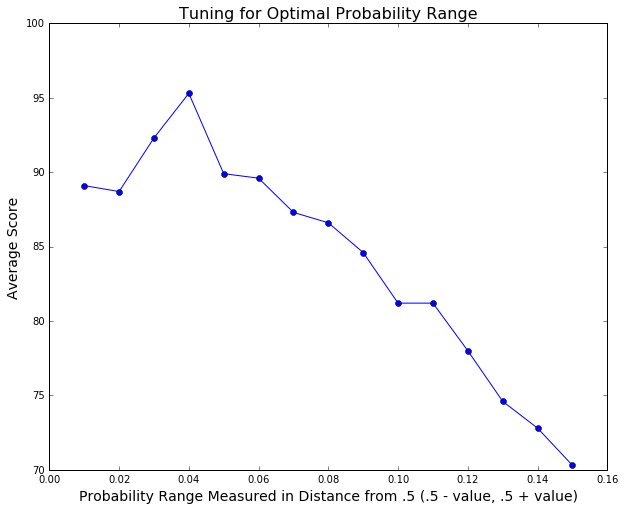

In [143]:
print probability_ranges.mean()
units = []
for i in range(1, 16, 1):
    f = float(i)/100.
    units.append(f)

#plot
fig, ax = plt.subplots(1, 1, figsize = (10,8))

ax.plot(units, probability_ranges.mean().values, '-bo')

ax.set_xlabel('Probability Range Measured in Distance from .5 (.5 - value, .5 + value)', size = 14)
ax.set_ylabel('Average Score', size = 14)  
ax.set_title('Tuning for Optimal Probability Range', size = 16)  

# 3 Our Final Model and Prediction

## Results

In [31]:
##OUR PREDICTIONS
BEST_NCOMP = 5
best_range_distance = .04
best_min_p = .5 - best_range_distance
best_max_p = .5 + best_range_distance

#predictions and scores with optimal n_components and probability range

final_scores = pd.DataFrame(columns = ['P # Correct', 'S # Correct', 'P Weighted', 'S Weighted', 'P Score'])

for i in range(2003, 2013):
    train = [i, i+1, i+2]
    test = i+3
    
    Pcount, Scount, Pweight, Sweight, Pscore = test_year(test, train, BEST_NCOMP, best_max_p, best_min_p)
    final_scores.loc[i+3] = [Pcount, Scount, Pweight, Sweight, Pscore]
    
final_scores

/Users/christinatenuta/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,P # Correct,S # Correct,P Weighted,S Weighted,P Score
2006,36.0,38.0,67.0,63.0,69.0
2007,53.0,48.0,167.0,109.0,174.0
2008,42.0,45.0,95.0,114.0,98.0
2009,42.0,44.0,80.0,90.0,83.0
2010,42.0,36.0,74.0,63.0,76.0
2011,40.0,39.0,56.0,58.0,58.0
2012,41.0,41.0,117.0,89.0,121.0
2013,38.0,39.0,104.0,81.0,108.0
2014,40.0,42.0,69.0,71.0,71.0
2015,40.0,45.0,92.0,90.0,95.0


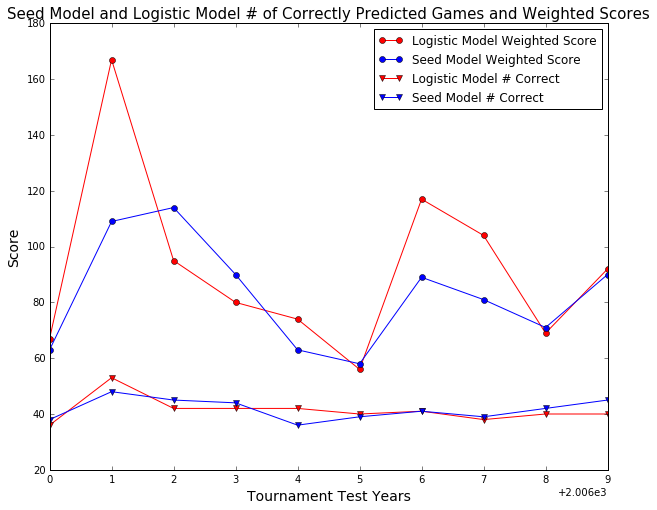

In [32]:
#plot
fig, ax = plt.subplots(1, 1, figsize = (10,8))

ax.plot(range(2006,2016), final_scores['P Weighted'].values, '-ro', label = 'Logistic Model Weighted Score')
ax.plot(range(2006,2016), final_scores['S Weighted'].values, '-bo', label = 'Seed Model Weighted Score')
ax.plot(range(2006,2016), final_scores['P # Correct'].values, '-rv', label = 'Logistic Model # Correct')
ax.plot(range(2006,2016), final_scores['S # Correct'].values, '-bv', label = 'Seed Model # Correct')



ax.set_xlabel('Tournament Test Years', size = 14)
ax.set_ylabel('Score', size = 14)  
ax.set_title('Seed Model and Logistic Model # of Correctly Predicted Games and Weighted Scores', size = 15)  
ax.legend(loc = 'best')


Above are the results from our fully tuned model. When we compare our model to the baseline, seed only model, we see that the number of games predicted correctly is about the same as the seed model. However, it is important to note that our model is much better at predicting later games. We can see that in 6 out of the 10 test years, we beat the seeded model by points scored. Though the model does not guarantee a win every year, the fact that it accounts for deviation from the seed model results in a model that will give the user a higher possibility of winning in their bracket tournament. 

Because building a March Madness bracket is more than simply guessing games correctly, we feel as though we have built a model that will allow users to potentially win their brackets and differentiate from the seed model, which is most important. The ability to score well is extremely important in these competition, and we can see that our model is very good at predicting later games in the tournament. Our model is built to score points, not games. 

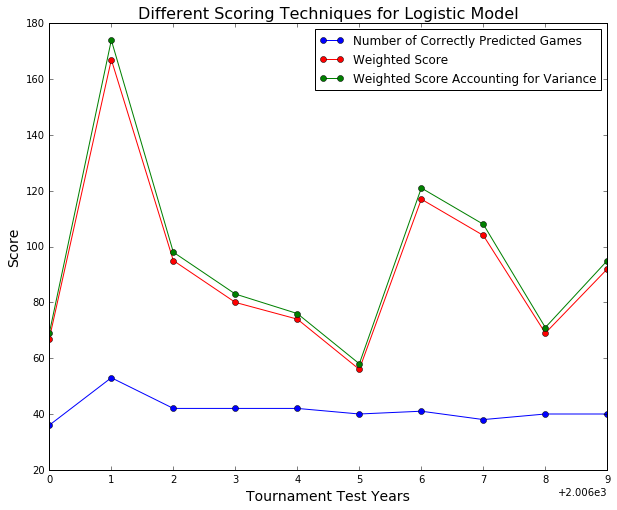

In [145]:
#plot
fig, ax = plt.subplots(1, 1, figsize = (10,8))

ax.plot(range(2006,2016), final_scores['P # Correct'].values, '-bo', label = 'Number of Correctly Predicted Games')
ax.plot(range(2006,2016), final_scores['P Weighted'].values, '-ro', label = 'Weighted Score')
ax.plot(range(2006,2016), final_scores['P Score'].values, '-go', label = 'Weighted Score Accounting for Variance')

ax.set_xlabel('Tournament Test Years', size = 14)
ax.set_ylabel('Score', size = 14)  
ax.set_title('Different Scoring Techniques for Logistic Model', size = 16)  
ax.legend(loc = 'best')

# 4 2016 Prediction

In [64]:

def probabilities(season_stats, tourney_results, tourney_seeds, elo_rating, train_years, test_year, n_comp):
    #TRAINING DATA
    #find stats for years 
    train_stats, _ = features_and_stats(season_stats, tourney_results, tourney_seeds, elo_rating, train_years, n_comp)
    #create x_train and y_train
    train_data = x_train_generator(tourney_results, train_stats, train_years, n_comp)
    y_train = train_data['Y']
    x_train = train_data.copy()
    del x_train['Season']
    del x_train['TeamA']
    del x_train['TeamB']
    del x_train['Y']
    
    #TESTING DATA 
    #find stats for testing data
    test_stats, _ = features_and_stats(season_stats, tourney_results, tourney_seeds, elo_rating, [test_year], n_comp)
    #create x_train and y_train
    test_data = x_train_generator(tourney_results, test_stats, [test_year], n_comp)
    y_test = test_data['Y']
    x_test = test_data.copy()
    del x_test['Season']
    del x_test['TeamA']
    del x_test['TeamB']
    del x_test['Y']
    
    #calibrate for C and fit model 
    #get best c
#     best_c, _ = fit_tune_model(x_train, y_train, x_test, y_test, 10, 1000)
#     get best model
#     model = fit_best_model(x_train, y_train)
    model = LogReg()
    model.fit(x_train, y_train)
    
    #create df of all possible games 
    poss_games = possible_games(tourney_seeds, test_stats, test_year, n_comp)
    
    #remove unneccessary columns
    pred_data = poss_games.copy()
    del pred_data['A_Team A']
    del pred_data['B_Team B']
    del pred_data['B_Season']
    del pred_data['A_Season']

    #get model predictions
    #this will return a two column data frame, want second column
    predicts = pd.DataFrame(model.predict_proba(pred_data))
    poss_games['Probability Team A Wins'] = predicts[1]

    final_data = poss_games[['A_Team A','B_Team B', 'Probability Team A Wins']]
    
    return final_data

In [65]:
# predict a bracket for 2016
def test_year(test_year, train_years, n_comp, max_p, min_p):
    #import data
    tourney_seeds = pd.read_csv('march-machine-learning-mania-2016-v2/TourneySeeds.csv', delimiter = ',')
    initial_bracket = pd.read_csv('march-machine-learning-mania-2016-v2/TourneySlots.csv', delimiter = ',')
    tourney_results = pd.read_csv('march-machine-learning-mania-2016-v2/TourneyCompactResults.csv', delimiter = ',')
    season_stats = pd.read_csv('march-machine-learning-mania-2016-v2/RegularSeasonDetailedResults.csv', delimiter = ',')
    elo_rating = pd.read_csv('march-machine-learning-mania-2016-v2/EloScores.csv', delimiter = ',')

    #run model to find probabilities 
    test_probs = probabilities(season_stats, tourney_results, tourney_seeds, elo_rating, train_years, test_year, n_comp)
    
    #fill in predicted bracket 
    predicted_bracket = fill_bracket(tourney_seeds[tourney_seeds['Season'] == test_year], 
                 initial_bracket[initial_bracket['Season'] == test_year], 
                 test_probs, max_p, min_p)
    
    #fill in seeds bracket 
    seed_predictions = seed_bracket(tourney_seeds[tourney_seeds['Season'] == test_year],
                                    initial_bracket[initial_bracket['Season'] == test_year])
    
#     #fill in actual outcomes 
#     actual_outcome = actual_bracket(tourney_seeds[tourney_seeds['Season'] == test_year],
#                                     initial_bracket[initial_bracket['Season'] == test_year], 
#                                     tourney_results[tourney_results['Season'] == test_year])
    
    #compare accuracies 
#     seed_weighted_acc = weighted_accuracy(seed_predictions, actual_outcome)
#     predicted_weighted_acc = weighted_accuracy(predicted_bracket, actual_outcome)
    
# #     seed_count_acc = count_accuracy(seed_predictions, actual_outcome)
#     predicted_count_acc = count_accuracy(predicted_bracket, actual_outcome)
    
#     predicted_score = weighted_variable_accuracy(predicted_bracket, seed_predictions, actual_outcome)

    return predicted_bracket, seed_predictions

In [68]:
BEST_NCOMP = 5
best_range_distance = .04
best_min_p = .5 - best_range_distance
best_max_p = .5 + best_range_distance

predicted_bracket_2016, seed_predictions_2016 = test_year(2016, [2013,2014,2015], BEST_NCOMP, best_max_p, best_min_p)

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [69]:
predicted_bracket_2016.to_csv('predicted_bracket_2016.csv')
seed_predictions_2016.to_csv('seed_predictions_2016.csv')